# Decision Tree - Hotel Reservations

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read file using read_csv function
df = pd.read_csv('./Hotel_Reservations.csv')
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

## Basic EDA

In [3]:
# number of rows and columns
df.shape

(36275, 19)

In [4]:
# data type of each column
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [5]:
# summary of the data: column names, total no.of non-null values, data types, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# summary statistics for numeric data types
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

In [7]:
# summary statistics for object data types
df.describe(include=['O'])

Booking_ID type_of_meal_plan room_type_reserved market_segment_type  \
count       36275             36275              36275               36275   
unique      36275                 4                  7                   5   
top      INN00001       Meal Plan 1        Room_Type 1              Online   
freq            1             27835              28130               23214   

       booking_status  
count           36275  
unique              2  
top      Not_Canceled  
freq            24390

In [8]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
# count of duplicate rows
df[df.duplicated()].shape

(0, 19)

## Decision Tree

In [10]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
#droping the Booking ID column
df.drop(['Booking_ID'], axis=1, inplace=True)
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

### # we are transforming the data into numbers because the DecisionTreeClassifier algorithm works with numerical data and cannot handle categorical data directly

In [12]:
# importing 'OneHotEncoder' to convert categorical variables into numerical values
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Apply the OneHotEncoder to the 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type' columns
type_of_meal_plan_encoded = onehot_encoder.fit_transform(df[['type_of_meal_plan']])
type_of_meal_plan_encoded_Col_names = onehot_encoder.get_feature_names_out(['type_of_meal_plan'])

room_type_reserved_encoded = onehot_encoder.fit_transform(df[['room_type_reserved']])
room_type_reserved_encoded_Col_names = onehot_encoder.get_feature_names_out(['room_type_reserved'])

market_segment_type_encoded = onehot_encoder.fit_transform(df[['market_segment_type']])
market_segment_type_encoded_Col_names = onehot_encoder.get_feature_names_out(['market_segment_type'])

/home/vboxuser/ds_class/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/vboxuser/ds_class/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/vboxuser/ds_class/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
type_of_meal_plan_encoded_Col_names, room_type_reserved_encoded_Col_names, market_segment_type_encoded_Col_names

(array(['type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
        'type_of_meal_plan_Not Selected'], dtype=object),
 array(['room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
        'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
        'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7'],
       dtype=object),
 array(['market_segment_type_Complementary',
        'market_segment_type_Corporate', 'market_segment_type_Offline',
        'market_segment_type_Online'], dtype=object))

In [14]:
# creating a new DataFrame with the newly generated values
type_of_meal_plan_encoded_df = pd.DataFrame(type_of_meal_plan_encoded, columns=type_of_meal_plan_encoded_Col_names)
room_type_reserved_encoded_df = pd.DataFrame(room_type_reserved_encoded, columns=room_type_reserved_encoded_Col_names)
market_segment_type_encoded_df = pd.DataFrame(market_segment_type_encoded, columns=market_segment_type_encoded_Col_names)

In [15]:
# concatenate the newly generated encoded values to the original DataFrame and dropping the original OBJECT type field 'Payment_Behaviour' 
df = pd.concat([df, type_of_meal_plan_encoded_df, room_type_reserved_encoded_df, market_segment_type_encoded_df], axis=1)
df = df.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1)

In [16]:
# preprocessing provides collection of functions and classes for preprocessing and transforming data before it is used in machine learning models
from sklearn import preprocessing

# using LabelEncoder to convert Drug into numbers as this will be our Target variable
label_encoder = preprocessing.LabelEncoder()
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])

In [17]:
df['booking_status'].value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [18]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  ...  room_type_reserved_Room_Type 2  \
0             2               0  ...                             0.0   
1             6               0  ...                             0.0   
2            28               0  ...                             0.0   
3            20               0  ...                             0.0   
4            11               0  ...                             0.0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                             0.0                                0.0   
1                             0.0                                0.0   
2                             0.0                                0.0   
3                             0.0                                0.0   
4                             0.0                                0.0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                            0.0                          1.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   

   market_segment_type_Online  
0                         0.0  
1                         1.0  
2                         1.0  
3                         1.0  
4                         1.0  

[5 rows x 28 columns]

In [19]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [20]:
# move the target column 'booking_status' to the end of the DataFrame
df = pd.concat([df.drop('booking_status', axis=1), df['booking_status']], axis=1)
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status'],
      dtype='object')

In [21]:
df.shape

(36275, 28)

In [22]:
X = df.iloc[:,0:27]
y = df.iloc[:,27]
X.shape

(36275, 27)

In [23]:
y.shape

(36275,)

In [24]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29020, 27), (7255, 27), (29020,), (7255,))

### Building Decision Tree Classifier using Entropy as a Criterion

In [26]:
# import the decisiontree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

# Train the classifier on the training data
model = DecisionTreeClassifier(criterion='entropy', max_depth = 22, random_state=44)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=22, random_state=44)

[Text(0.712352508311903, 0.9782608695652174, 'x[5] <= 151.5\nentropy = 0.912\nsamples = 29020\nvalue = [9485, 19535]'),
 Text(0.45653511522287415, 0.9347826086956522, 'x[13] <= 0.5\nentropy = 0.78\nsamples = 23371\nvalue = [5401, 17970]'),
 Text(0.1752025218680742, 0.8913043478260869, 'x[26] <= 0.5\nentropy = 0.918\nsamples = 12188\nvalue = [4053, 8135]'),
 Text(0.08023559838876666, 0.8478260869565217, 'x[5] <= 74.5\nentropy = 0.603\nsamples = 6191\nvalue = [911, 5280]'),
 Text(0.049483042416202924, 0.8043478260869565, 'x[2] <= 0.5\nentropy = 0.401\nsamples = 4380\nvalue = [349, 4031]'),
 Text(0.029705092532677623, 0.7608695652173914, 'x[25] <= 0.5\nentropy = 0.249\nsamples = 2653\nvalue = [110, 2543]'),
 Text(0.025503105991976187, 0.717391304347826, 'x[9] <= 0.5\nentropy = 0.481\nsamples = 887\nvalue = [92, 795]'),
 Text(0.018652128898667013, 0.6739130434782609, 'x[12] <= 87.25\nentropy = 0.563\nsamples = 689\nvalue = [91, 598]'),
 Text(0.012197489323152582, 0.6304347826086957, 'x[24]

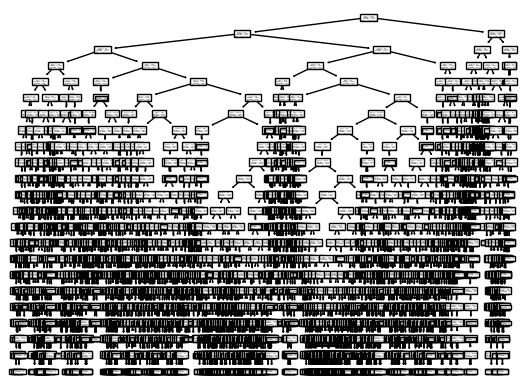

In [27]:
# visualizing decision tree
from sklearn import tree
tree.plot_tree(model)

[Text(0.712352508311903, 0.9782608695652174, 'lead_time <= 151.5\nentropy = 0.912\nsamples = 29020\nvalue = [9485, 19535]\nclass = Not_Canceled'),
 Text(0.45653511522287415, 0.9347826086956522, 'no_of_special_requests <= 0.5\nentropy = 0.78\nsamples = 23371\nvalue = [5401, 17970]\nclass = Not_Canceled'),
 Text(0.1752025218680742, 0.8913043478260869, 'market_segment_type_Online <= 0.5\nentropy = 0.918\nsamples = 12188\nvalue = [4053, 8135]\nclass = Not_Canceled'),
 Text(0.08023559838876666, 0.8478260869565217, 'lead_time <= 74.5\nentropy = 0.603\nsamples = 6191\nvalue = [911, 5280]\nclass = Not_Canceled'),
 Text(0.049483042416202924, 0.8043478260869565, 'no_of_weekend_nights <= 0.5\nentropy = 0.401\nsamples = 4380\nvalue = [349, 4031]\nclass = Not_Canceled'),
 Text(0.029705092532677623, 0.7608695652173914, 'market_segment_type_Offline <= 0.5\nentropy = 0.249\nsamples = 2653\nvalue = [110, 2543]\nclass = Not_Canceled'),
 Text(0.025503105991976187, 0.717391304347826, 'repeated_guest <= 0.

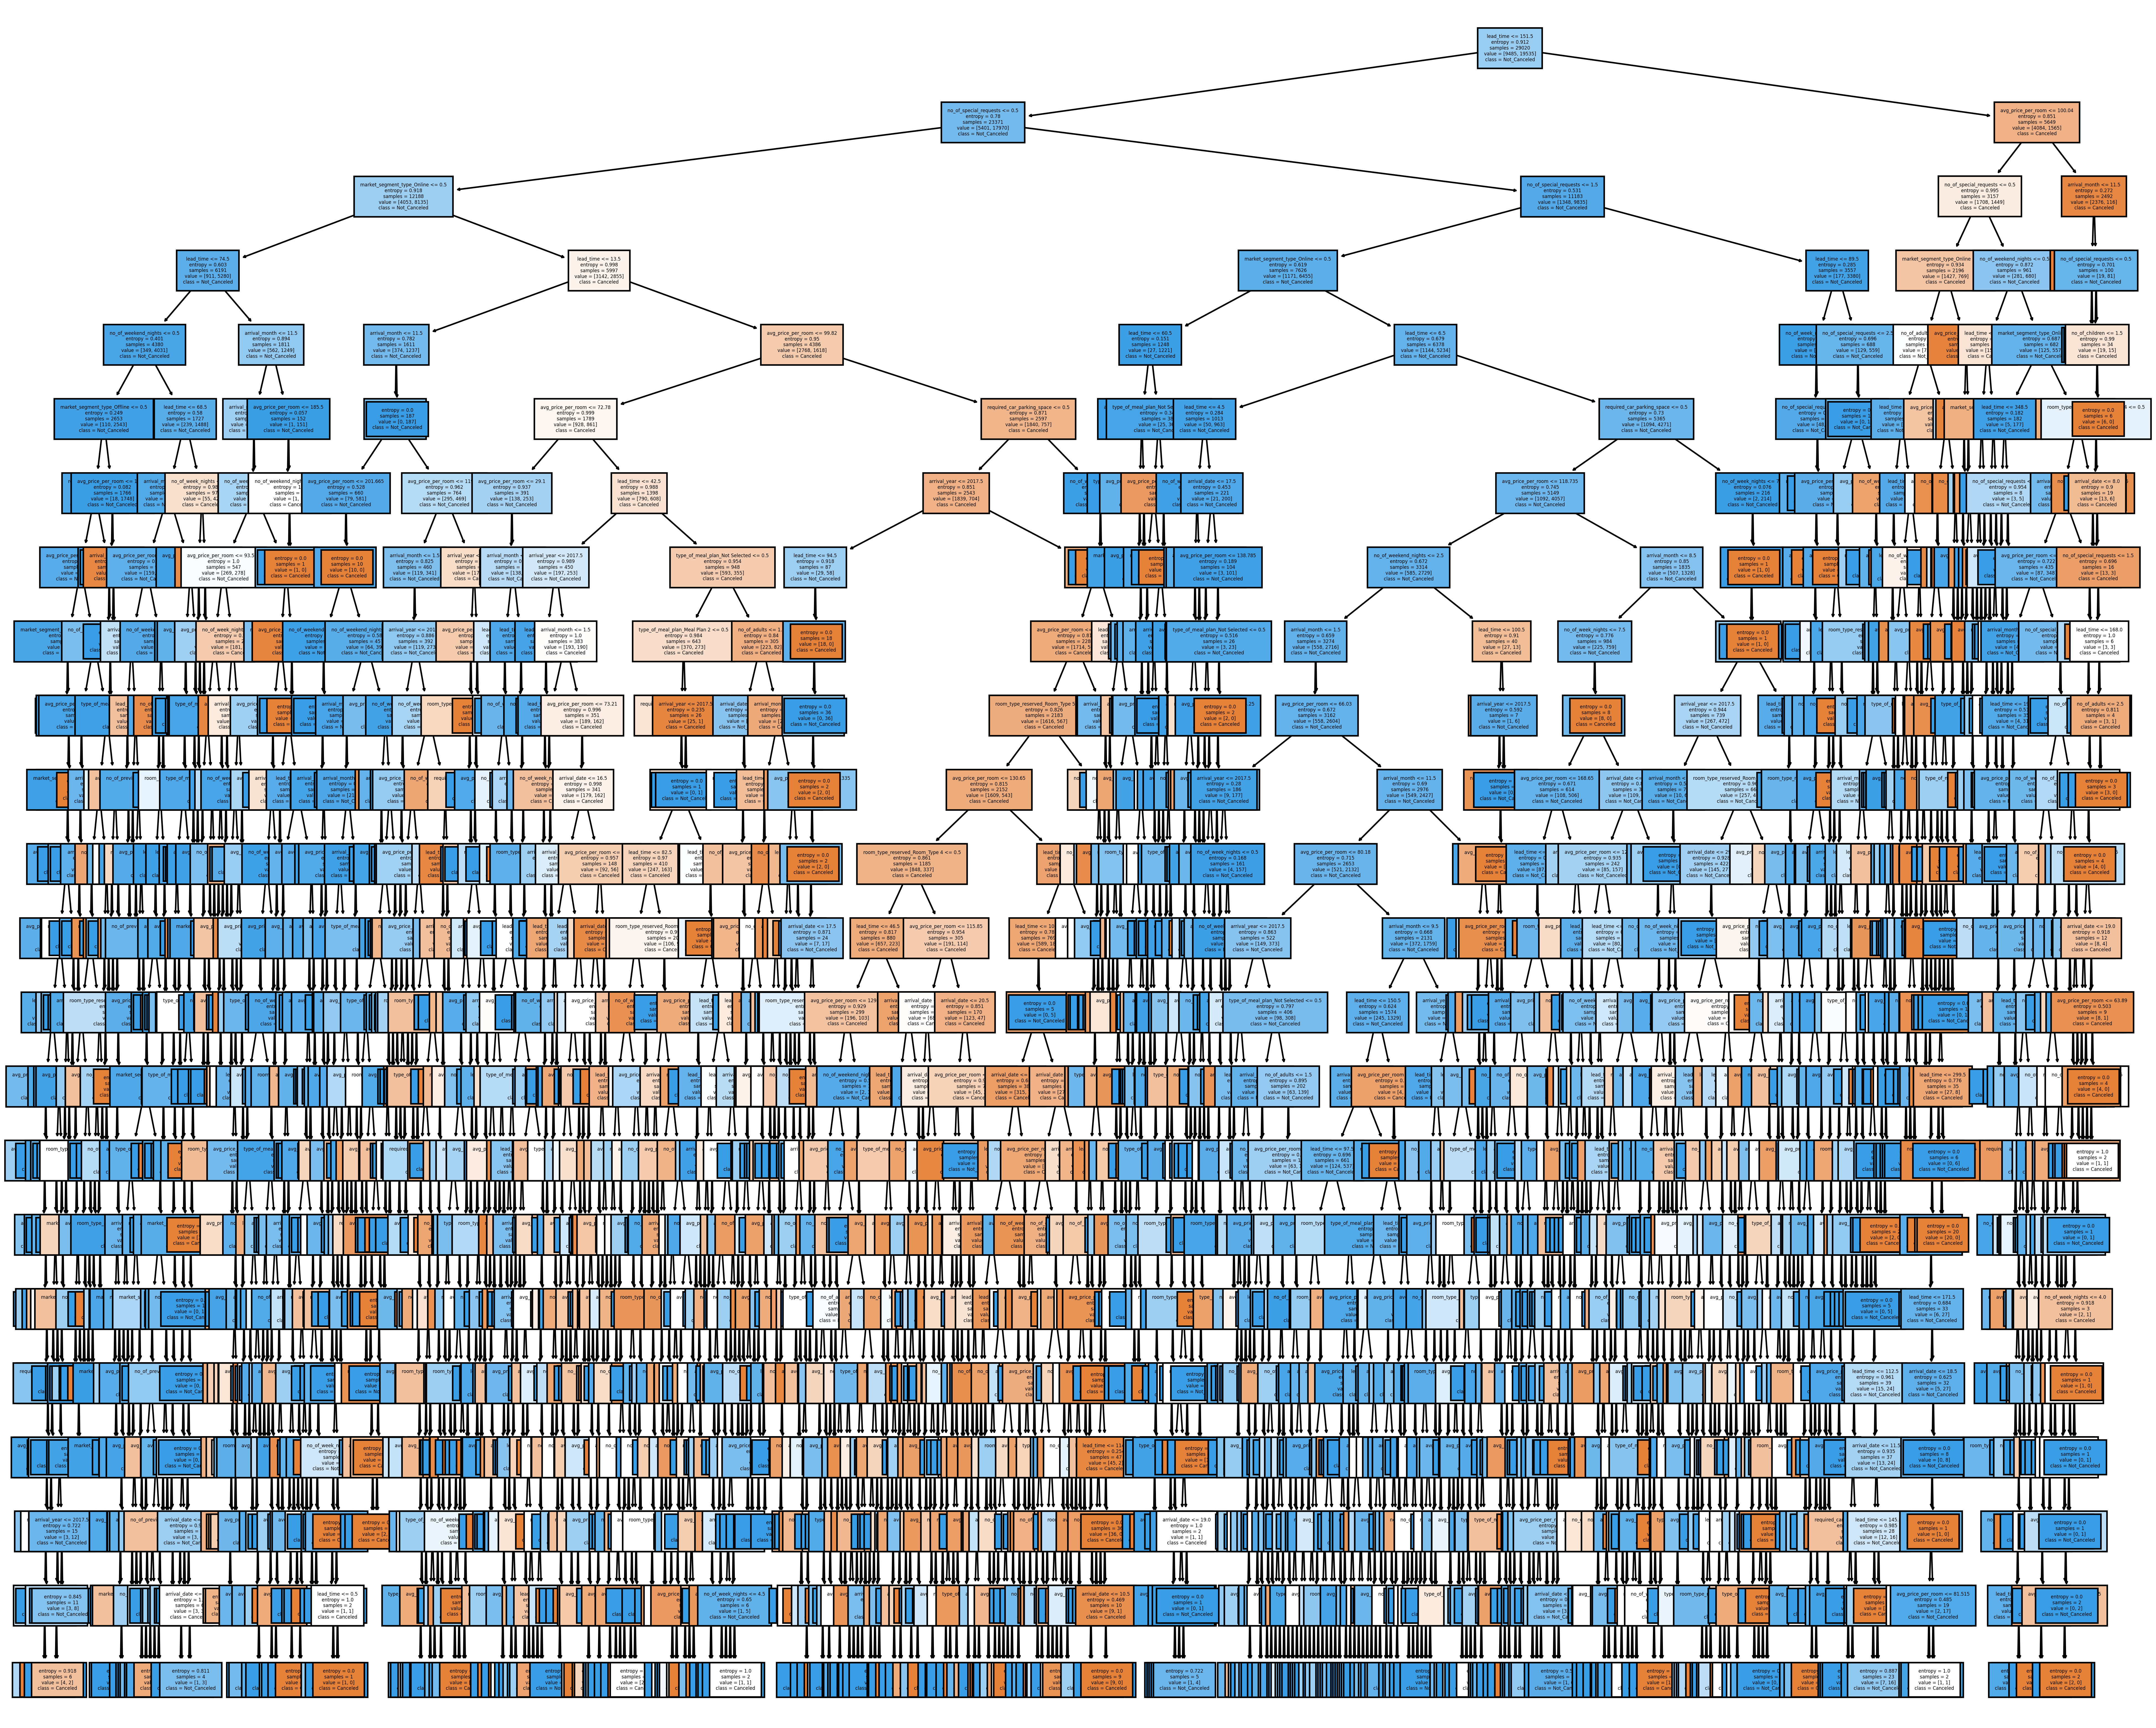

In [28]:
# visualizing decision tree with different parameters

fn = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights','no_of_week_nights', 'required_car_parking_space', 'lead_time','arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests','type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3','type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2','room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4','room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6','room_type_reserved_Room_Type 7', 'market_segment_type_Complementary','market_segment_type_Corporate', 'market_segment_type_Offline','market_segment_type_Online']
cn = ['Canceled', 'Not_Canceled']

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(24, 20), dpi=400, width_ratios=[1], height_ratios=[1])
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True, ax=axes, fontsize=3)

### Prediction on Test data

In [29]:
# make predictions on the test data

test_preds = model.predict(X_test)
test_preds

array([0, 1, 1, ..., 0, 1, 0])

In [30]:
# make predictions on the training data

train_preds = model.predict(X_train)
train_preds

array([1, 0, 1, ..., 1, 1, 1])

### Accuracy of the above model

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# evaluating the model's accuracy
accuracy = accuracy_score(y_test, test_preds)
classification_report_result = classification_report(y_test, test_preds)
confusion_matrix_result = confusion_matrix(y_test, test_preds)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

Accuracy: 0.8748449345279118
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      2400
           1       0.90      0.91      0.91      4855

    accuracy                           0.87      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255

Confusion Matrix:
 [[1918  482]
 [ 426 4429]]


In [32]:
train_accuracy = accuracy_score(y_train, train_preds)
train_classification_report_result = classification_report(y_train, train_preds)
train_confusion_matrix_result = confusion_matrix(y_train, train_preds)

print(f"Training Accuracy: {train_accuracy}")
print("Training Classification Report:\n", train_classification_report_result)
print("Training Confusion Matrix:\n", train_confusion_matrix_result)

Training Accuracy: 0.9660578911095796
Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      9485
           1       0.97      0.98      0.97     19535

    accuracy                           0.97     29020
   macro avg       0.96      0.96      0.96     29020
weighted avg       0.97      0.97      0.97     29020

Training Confusion Matrix:
 [[ 8868   617]
 [  368 19167]]


### Crosstab : Way to understand the two way table between predicted vs actual

In [33]:
pd.crosstab(y_test, test_preds, rownames=['booking_status (actual)'], colnames=['booking_status (predicted)'], margins=True, margins_name='Total')

booking_status (predicted)     0     1  Total
booking_status (actual)                      
0                           1918   482   2400
1                            426  4429   4855
Total                       2344  4911   7255